In [2]:
nltk.download('popular', quiet=True) # for downloading packages

nltk.download('punkt') # first-time use only

nltk.download('wordnet') # first-time use only




from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define the documents
documents = [
    "Donald Trump is the 45th president of the United States.",
    "The 2024 U.S. election is coming up soon.",
    "Vladimir Putin has been president of Russia for many years."
]

# Create the Document Term Matrix
count_vect = CountVectorizer(stop_words='english')  # you can keep stop_words='english' for common word exclusion
sparse_matrix = count_vect.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas DataFrame to view word frequencies
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])
print(df)


              2024  45th  coming  donald  election  president  putin  russia  \
doc_trump        0     1       0       1         0          1      0       0   
doc_election     1     0       1       0         1          0      0       0   
doc_putin        0     0       0       0         0          1      1       1   

              soon  states  trump  united  vladimir  years  
doc_trump        0       1      1       1         0      0  
doc_election     1       0      0       0         0      0  
doc_putin        0       0      0       0         1      1  


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

# Create the Document Term Matrix
count_vect = CountVectorizer(stop_words='english')  # Exclude common stop words
sparse_matrix = count_vect.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas DataFrame to view word frequencies
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])

# Display the resulting DataFrame
print(df)



              career  claimed  earlier  election  elections  friend  friends  \
doc_trump          0        0        0         1          0       0        2   
doc_election       0        1        0         2          0       1        0   
doc_putin          1        0        1         0          1       0        0   

              interference  lost  minister  ...  putin  republican  russia  \
doc_trump                0     1         0  ...      1           1       0   
doc_election             1     0         0  ...      2           0       0   
doc_putin                0     0         1  ...      2           0       1   

              says  served  support  trump  vladimir  winning  witchhunt  
doc_trump        0       0        1      2         0        1          0  
doc_election     2       0        0      1         0        0          1  
doc_putin        0       1        0      0         1        0          0  

[3 rows x 27 columns]


In [7]:
# Compute Cosine Similarity

from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(df, df))






[[1.         0.51639778 0.36893239]
 [0.51639778 1.         0.45360921]
 [0.36893239 0.45360921 1.        ]]


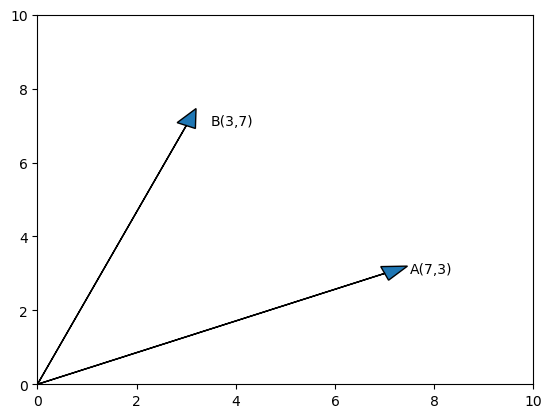

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# consider two vectors A and B in 2-D

A = np.array([7,3])

B = np.array([3,7])

ax = plt.axes()

ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)

plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))

ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)

plt.annotate(f"B({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))

plt.xlim(0,10)

plt.ylim(0,10)

plt.show()

plt.close()






In [9]:
# cosine similarity between A and B

cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

print (f"Cosine Similarity between A and B:{cos_sim}")

print (f"Cosine Distance between A and B:{1-cos_sim}")






Cosine Similarity between A and B:0.7241379310344827
Cosine Distance between A and B:0.27586206896551735


In [1]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
# Intersaction and Union of two sets can also be done using & and | operators
C = A.intersection(B)
D = A.union(B)
print('AnB = ', C)
print('AUB = ', D)
print('J(A,B) = ', float(len(C))/float(len(D)))

AnB =  {1, 2}
AUB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B) =  0.25


In [4]:
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))     
    return intersection / union
set_a = {"Language", "for", "Computer", "NLP", "Science"}
set_b = {"NLP", "for", "Language", "Data", 'ML', "AI"}
similarity = jaccard_similarity(set_a, set_b)
print("Jaccard Similarity:", similarity)

Jaccard Similarity: 0.375


In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Step 1: Define predefined chatbot responses
responses = [
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition.",
    "We offer free shipping on orders over $50.",
    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."
]

In [3]:
# Step 2: Sample user input (this would come from a user in a real chatbot)
user_input = "How can I track my order?"

In [4]:
# Step 3: Preprocess the text using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')  # Removing stopwords like 'the', 'is', etc.
all_texts = responses + [user_input]  # Combine responses with the user input for vectorization

In [5]:
# Step 4: Convert the text to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [6]:
# Step 5: Compute cosine similarity between the user input and all responses
user_vector = tfidf_matrix[-1]  # The user input is the last text in the matrix
response_vectors = tfidf_matrix[:-1]  # All predefined responses
# Calculate cosine similarities
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [7]:
# Step 6: Find the most similar response
most_similar_idx = np.argmax(cosine_similarities)  # Find the index of the most similar response

In [8]:
# Step 7: Display the most relevant response
print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}"

User Query: How can I track my order?
Most relevant response: To track your order, you can visit the 'Order Tracking' page and enter your order number.


In [1]:
import io

import random

import string # to process standard python strings

import warnings

warnings.filterwarnings('ignore')

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw documents to a matrix of TF-IDF features

from sklearn.metrics.pairwise import cosine_similarity

from nltk.stem import WordNetLemmatizer






In [2]:
# Install nltk (run this in your terminal or a Jupyter notebook cell)
!pip install nltk

# Import nltk
import nltk

In [ ]:
import nltk

# Download necessary resources (only need to do this once)
nltk.download('popular', quiet=True)  # Download popular resources
nltk.download('punkt')                # For tokenization
nltk.download('wordnet')              # For lemmatization and synonyms

# Open the file in read mode, ignoring errors
with open('input.txt', 'r', errors='ignore') as f:
    raw = f.read()

# Convert the text to lowercase
raw = raw.lower()

# Tokenize the text
tokens = nltk.word_tokenize(raw)

# Print the first few tokens
print(tokens[:10])

# Lemmatization (using WordNet)
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize the first 5 tokens
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens[:5]]
print("Lemmatized tokens:", lemmatized_tokens)


In [ ]:
import nltk

# Ensure necessary resources are downloaded
nltk.download('punkt')  # For sentence and word tokenization
nltk.download('stopwords')  # For stopword removal

# Read the text file
with open('input.txt', 'r', errors='ignore') as f:
    raw = f.read()

# Convert text to lowercase
raw = raw.lower()

# Tokenize the raw text into sentences and words
sent_tokens = nltk.sent_tokenize(raw)  # Sentence tokenization
word_tokens = nltk.word_tokenize(raw)  # Word tokenization

# Print the first 2 sentences
print("First 2 sentences:")
print(sent_tokens[:2])

# Print the first 10 word tokens
print("\nFirst 10 word tokens:")
print(word_tokens[:10])

# Remove punctuation and stopwords (optional step)
from nltk.corpus import stopwords
from string import punctuation

# Get the set of stopwords in English
stop_words = set(stopwords.words('english'))

# Filter out stopwords and punctuation from word tokens
filtered_words = [word for word in word_tokens if word not in stop_words and word not in punctuation]

# Print the first 10 filtered words
print("\nFirst 10 filtered words (no stopwords or punctuation):")
print(filtered_words[:10])


In [ ]:
import nltk
import string

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmer = nltk.stem.WordNetLemmatizer()

# Function to lemmatize tokens
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

# Remove punctuation
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# Function to normalize text (lowercase, remove punctuation, and lemmatize)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Example text
text = "Running is fun, and I enjoy running fast!"

# Normalize the text (lowercase, remove punctuation, and lemmatize)
normalized_tokens = LemNormalize(text)

# Print the lemmatized tokens
print("Normalized tokens:", normalized_tokens)
